In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib as plt
import seaborn as sns
import math
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM

In [10]:
# Importing dataset using short_name as df3

df3=pd.read_csv("E:/Data/use data/csv/PT_crime_rates_by_per_million_passenger_journeys.csv")

In [11]:
df3.head()

,Month,Bus,Underground,Tramlink
0,04/09/22,11.3,13.3,17.4
1,05/09/22,11.1,14.6,18.1
2,06/09/22,11.1,13.1,17.4
3,07/09/22,11.2,12.5,16.3
4,08/09/22,9.7,13.2,17.4


In [16]:
#Checking null values
df3.isnull().sum()/len(df3)*100

Month          0.0
Bus            0.0
Underground    0.0
Tramlink       0.0
dtype: float64

In [13]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Month        132 non-null    object 
 1   Bus          132 non-null    float64
 2   Underground  132 non-null    float64
 3   Tramlink     132 non-null    float64
dtypes: float64(3), object(1)
memory usage: 4.2+ KB


<AxesSubplot:title={'center':'PT_crime_rates_by_per_million_passenger_journeys'}>

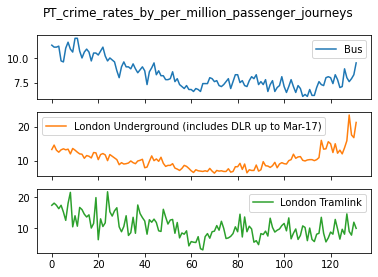

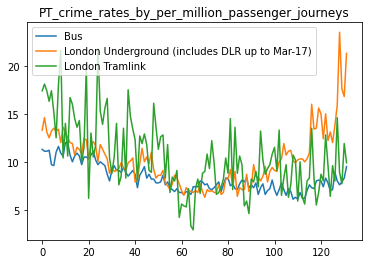

In [109]:
#Visualize the London_underground_average_monthly_temp
df2.plot.line(subplots = True, title='PT_crime_rates_by_per_million_passenger_journeys')
df2.plot(title='PT_crime_rates_by_per_million_passenger_journeys')

D:\Programs\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bus'>

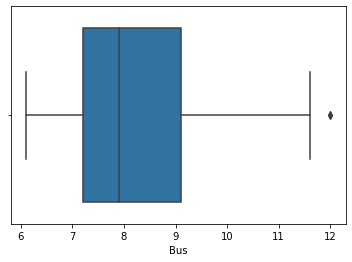

In [21]:
# Box Plot
import seaborn as sns
sns.boxplot(df3['Bus'])

D:\Programs\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Underground'>

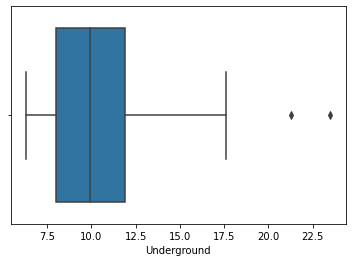

In [22]:
sns.boxplot(df3['Underground'])

D:\Programs\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tramlink'>

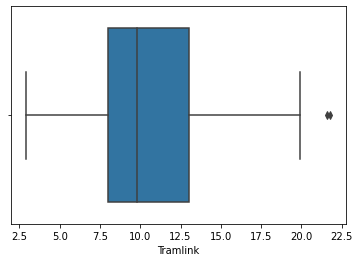

In [23]:
sns.boxplot(df3['Tramlink'])

In [24]:
#Data normalization
from sklearn import preprocessing
import numpy as np
a = np.random.random((1, 4))
a = a*20
print("Data = ", a)
# normalize the data attributes
normalized = preprocessing.normalize(a)
print("Normalized Data = ", normalized)

Data =  [[ 7.74850925  3.07612058  8.42736481 11.2515321 ]]
Normalized Data =  [[0.4740951  0.18821346 0.5156311  0.68842871]]


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

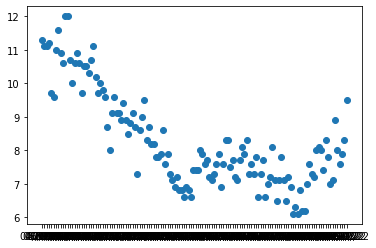

In [28]:
#visualise crime rates by passenger of Bus
plt.scatter(df3['Month'],df3['Bus'])

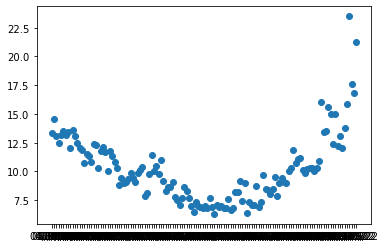

In [33]:
#visualise crime rates by passenger of Underground
plt.scatter(df3['Month'],df3['Underground'])

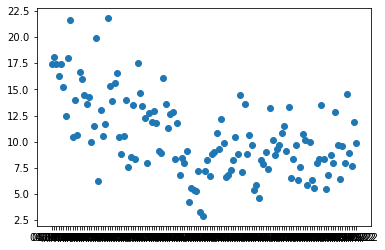

In [34]:
#visualise crime rates by passenger of Tramlink
plt.scatter(df3['Month'],df3['Tramlink'])

In [90]:
#split dataset in features and target variable
x = df3[['Bus','Underground','Tramlink']]
y = df3[['Month']]

In [91]:
# split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.26,random_state=42)

In [92]:
# feature scaling
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

In [93]:
x

,Bus,Underground,Tramlink
0,11.3,13.3,17.4
1,11.1,14.6,18.1
2,11.1,13.1,17.4
3,11.2,12.5,16.3
4,9.7,13.2,17.4
...,...,...,...
127,8.0,15.9,14.6
128,7.6,23.5,8.9
129,7.9,17.6,7.7
130,8.3,16.8,11.9


In [94]:
y

,Month
0,04/09/22
1,05/09/22
2,06/09/22
3,07/09/22
4,08/09/22
...,...
127,11/19/22
128,12/19/22
129,01/20/22
130,02/20/22


In [95]:
len(x_train)

97

In [96]:
len(x_test)

35

In [97]:
x_train

array([[-0.88791349,  0.06390432, -0.64833843],
       [-0.23045083, -0.54521834,  0.65535065],
       [ 1.96109136,  0.49387325,  0.93876132],
       [-0.44960505, -1.19017174, -0.59165629],
       [-0.15739942, -0.86769504, -1.0167723 ],
       [ 2.10719418,  0.70885772,  0.06018825],
       [ 0.0617548 ,  0.13556581,  0.42862212],
       [-0.59570786, -1.11851025, -0.87506696],
       [-0.66875927, -1.154341  , -1.6119347 ],
       [ 0.64616605, -0.25857238, -0.42160989],
       [ 0.0617548 ,  1.74794931,  0.71203278],
       [-0.37655364, -1.01101802,  0.08852931],
       [ 1.74193714,  1.24631889,  0.03184718],
       [ 0.64616605, -0.29440313, -0.7617027 ],
       [-0.59570786, -1.19017174, -0.59165629],
       [ 1.30362871,  0.60136549,  1.42055946],
       [-0.81486208, -0.36606462,  0.34359891],
       [ 0.35396042,  0.06390432,  1.78899333],
       [-0.66875927, -0.76020281,  0.82539705],
       [-1.18011911, -0.61687983, -0.81838483],
       [-0.44960505, -0.8318643 , -0.563

In [98]:
x_test

array([[-0.81486208, -0.86769504, -0.53497416],
       [-0.74181067, -0.40189536,  0.93876132],
       [ 1.66888574,  0.78051921,  2.72424854],
       [ 1.01142308, -0.40189536,  0.06018825],
       [-0.23045083, -0.90352578, -0.98843123],
       [-0.74181067,  1.1746574 , -0.56331523],
       [-0.66875927, -1.08267951, -0.98843123],
       [-0.44960505,  4.7935626 , -0.39326883],
       [-1.18011911, -1.154341  , -1.98036857],
       [ 1.15752589,  0.42221176,  1.02378452],
       [ 0.93837167, -0.04358792,  0.74037385],
       [ 1.01142308,  0.24305804,  1.50558266],
       [-0.01129661,  0.31471953, -0.39326883],
       [ 1.08447449,  1.10299591,  2.01572186],
       [-0.74181067, -0.40189536, -0.16654029],
       [-1.25317052, -0.40189536, -0.33658669],
       [ 0.50006324, -0.36606462, -0.56331523],
       [-0.52265645, -0.33023387,  1.19383092],
       [ 0.35396042, -0.79603355,  0.57032745],
       [-0.96096489, -1.01101802, -1.41354723],
       [ 1.66888574,  0.81634995,  0.343

In [108]:
y_test

,Month
56,12/13/22
83,03/16/22
19,11/10/22
31,11/11/22
76,08/15/22
117,01/19/22
55,11/13/22
128,12/19/22
64,08/14/22
26,06/11/22


In [99]:
# import the class
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# instantiate the model (using the default parameters)
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)
y_pred=KNN.predict(x_test)
print("KNeighborsClassifier score: ",KNN.score(x_test, y_test))
# evaluate accuracy
print("KNeighborsClassifier accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))

KNeighborsClassifier score:  0.0
KNeighborsClassifier accuracy: 0.00


D:\Programs\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [100]:
# import the class
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# instantiate the model (using the default parameters)
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
y_pred=RF.predict(x_test)
print("RandomForestClassifier score: ",RF.score(x_test, y_test))
# evaluate accuracy
print("RandomForestClassifier accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))

<ipython-input-100-e1a9155ff6d8>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(x_train, y_train)


RandomForestClassifier score:  0.0
RandomForestClassifier accuracy: 0.00


In [101]:
# import the class
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# instantiate the model (using the default parameters)
LR = LogisticRegression()
LR.fit(x_train, y_train)
y_pred=LR.predict(x_test)
print("LogisticRegression Classifier score: ",LR.score(x_test, y_test))
# evaluate accuracy
print("LogisticRegression Classifier accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))

LogisticRegression Classifier score:  0.0
LogisticRegression Classifier accuracy: 0.00


D:\Programs\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [103]:
#import the class
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
# instantiate the model (using the default parameters)
NB = GaussianNB()
NB.fit(x_train, y_train)
y_pred=NB.predict(x_test)
print("Naive Bayes score: ",NB.score(x_test, y_test))
# evaluate accuracy
print("Naive Bayes Classifier accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))

Naive Bayes score:  0.0
Naive Bayes Classifier accuracy: 0.00


D:\Programs\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [104]:
#import the class
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
SVM = SVC(kernel='poly', degree=8)
SVM.fit(x_train, y_train)
y_pred = SVM.predict(x_test)
print("Support Vector Machines score: ",SVM.score(x_test, y_test))
# evaluate accuracy
print("Support Vector Machines accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))

Support Vector Machines score:  0.0
Support Vector Machines accuracy: 0.00


D:\Programs\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
